
<h1 style="background-color: lightblue; color: navy; padding: 10px; border: 2px solid darkblue; text-align: center;">
    TP1 : Logique Floue
</h1>



<h2 style="text-align: center; color: gray;">Réalisé par : EL HILALI ILHAM </h2>

### Partie 1:

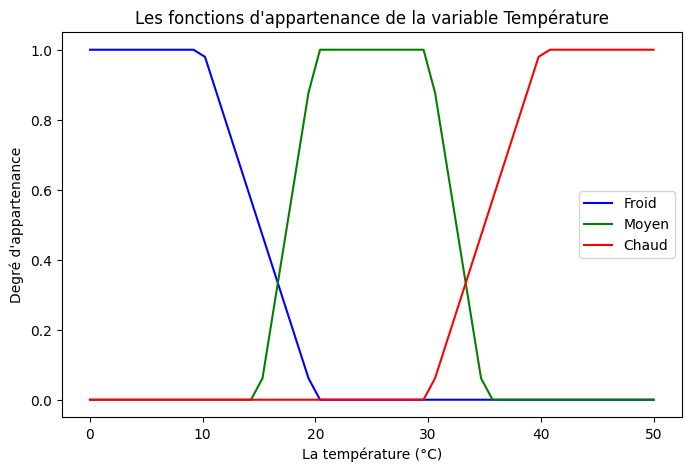

In [1]:

import floulib
import numpy as np
import skfuzzy 
import matplotlib.pyplot as plt
# Définir la plage des valeurs de la variable floue Température (0 à 50°C)
temperature = np.linspace(0, 50)

# les fonctions d'appartenance trapézoïdales pour les différents niveaux de Température
temperature_froid = skfuzzy.trapmf(temperature, [0, 0, 10, 20])     # Froid
temperature_moyen = skfuzzy.trapmf(temperature, [15, 20, 30, 35])    # Moyen
temperature_chaud = skfuzzy.trapmf(temperature, [30, 40, 50, 50])    # Chaud
# Visualisation
plt.figure(figsize=(8, 5))
plt.plot(temperature, temperature_froid, 'b', label='Froid')
plt.plot(temperature, temperature_moyen, 'g', label='Moyen')
plt.plot(temperature, temperature_chaud, 'r', label='Chaud')
plt.title("Les fonctions d'appartenance de la variable Température")
plt.xlabel("La température (°C)")
plt.ylabel("Degré d'appartenance")
plt.legend()
plt.show()

### Partie 2:

In [2]:
import numpy as np
import skfuzzy 
from skfuzzy import control as ctrl


temperature = ctrl.Antecedent(np.arange(0, 50), 'Température')
chauffage = ctrl.Consequent(np.arange(0, 100), 'Chauffage')


temperature['Froid'] = skfuzzy.trapmf(temperature.universe, [0, 0, 10, 20])
temperature['Moyen'] = skfuzzy.trapmf(temperature.universe, [15, 20, 30, 35])
temperature['Chaud'] = skfuzzy.trapmf(temperature.universe, [30, 40, 50, 50])


chauffage['Faible'] = skfuzzy.trapmf(chauffage.universe, [0, 0, 20, 40])
chauffage['Moyenne'] = skfuzzy.trapmf(chauffage.universe, [30, 50, 60, 80])
chauffage['Forte'] = skfuzzy.trapmf(chauffage.universe, [70, 90, 100, 100])


rule1 = ctrl.Rule(temperature['Froid'], chauffage['Forte'])   # Si Froid, alors Forte
rule2 = ctrl.Rule(temperature['Moyen'], chauffage['Moyenne'])  # Si Moyen, alors Moyenne
rule3 = ctrl.Rule(temperature['Chaud'], chauffage['Faible'])    # Si Chaud, alors Faible

chauffage_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
chauffage_system = ctrl.ControlSystemSimulation(chauffage_ctrl)

# Simulation avec Température à 25 °C
chauffage_system.input['Température'] = 25
chauffage_system.compute()  

# Afficher le résultat
print(f"Puissance du chauffage : {chauffage_system.output['Chauffage']:.2f}%")


Puissance du chauffage : 55.00%


### Partie 3:

In [4]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Définir les plages d'univers pour les variables d'entrée et de sortie
distance = ctrl.Antecedent(np.arange(0, 31, 1), 'Distance')  
visibilite = ctrl.Antecedent(np.arange(0, 11, 1), 'Visibilité') 
vitesse = ctrl.Consequent(np.arange(0, 101, 1), 'Vitesse')  

# Fonctions d'appartenance pour Distance
distance['Proche'] = fuzz.trapmf(distance.universe, [0, 0, 5, 10])  
distance['Moyenne'] = fuzz.trapmf(distance.universe, [5, 10, 15, 20])  
distance['Loin'] = fuzz.trapmf(distance.universe, [15, 20, 30, 30])

# Fonctions d'appartenance pour Visibilité
visibilite['Faible'] = fuzz.trapmf(visibilite.universe, [0, 0, 2, 4])  
visibilite['Moyenne'] = fuzz.trapmf(visibilite.universe, [3, 5, 6, 8])  
visibilite['Bonne'] = fuzz.trapmf(visibilite.universe, [7, 8, 10, 10])  

# Fonctions d'appartenance pour Vitesse
vitesse['Lente'] = fuzz.trapmf(vitesse.universe, [0, 0, 20, 40])  
vitesse['Normale'] = fuzz.trapmf(vitesse.universe, [30, 40, 60, 70])  
vitesse['Rapide'] = fuzz.trapmf(vitesse.universe, [60, 80, 100, 100])  


# Définir les règles floues
rule1 = ctrl.Rule(distance['Proche'] & visibilite['Faible'], vitesse['Lente'])  
rule2 = ctrl.Rule(distance['Proche'] & visibilite['Moyenne'], vitesse['Lente'])  
rule3 = ctrl.Rule(distance['Proche'] & visibilite['Bonne'], vitesse['Normale'])  

rule4 = ctrl.Rule(distance['Moyenne'] & visibilite['Faible'], vitesse['Lente'])  
rule5 = ctrl.Rule(distance['Moyenne'] & visibilite['Moyenne'], vitesse['Normale'])  
rule6 = ctrl.Rule(distance['Moyenne'] & visibilite['Bonne'], vitesse['Rapide'])  

rule7 = ctrl.Rule(distance['Loin'] & visibilite['Faible'], vitesse['Normale'])  
rule8 = ctrl.Rule(distance['Loin'] & visibilite['Moyenne'], vitesse['Rapide'])  
rule9 = ctrl.Rule(distance['Loin'] & visibilite['Bonne'], vitesse['Rapide'])  

# Créer le système de contrôle et ajouter les règles
vitesse_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
vitesse_system = ctrl.ControlSystemSimulation(vitesse_ctrl)


# Simuler différents scénarios
scenarios = [
    (5, 2),   # Proche, Faible visibilité
    (10, 5),  # Proche, Moyenne visibilité
    (15, 8),  # Moyenne, Bonne visibilité
    (20, 3),  # Moyenne, Faible visibilité
    (25, 7),  # Loin, Bonne visibilité
    (30, 1)   # Loin, Très faible visibilité
]

for distance_value, visibility_value in scenarios:
    vitesse_system.input['Distance'] = distance_value
    vitesse_system.input['Visibilité'] = visibility_value
    vitesse_system.compute()  # Calculer la sortie
    print(f"Distance: {distance_value}m, Visibilité: {visibility_value}, Vitesse recommandée: {vitesse_system.output['Vitesse']:.2f}%")


Distance: 5m, Visibilité: 2, Vitesse recommandée: 15.56%
Distance: 10m, Visibilité: 5, Vitesse recommandée: 50.00%
Distance: 15m, Visibilité: 8, Vitesse recommandée: 84.44%
Distance: 20m, Visibilité: 3, Vitesse recommandée: 50.00%
Distance: 25m, Visibilité: 7, Vitesse recommandée: 82.38%
Distance: 30m, Visibilité: 1, Vitesse recommandée: 50.00%


In [5]:
# Fonctions d'appartenance pour Distance (ajustement des seuils)
distance['Proche'] = fuzz.trapmf(distance.universe, [0, 0, 4, 8]) 
distance['Moyenne'] = fuzz.trapmf(distance.universe, [5, 10, 12, 18])  
distance['Loin'] = fuzz.trapmf(distance.universe, [15, 20, 30, 30])  

# Fonctions d'appartenance pour Visibilité (ajustement des seuils)
visibilite['Faible'] = fuzz.trapmf(visibilite.universe, [0, 0, 1, 3])  
visibilite['Moyenne'] = fuzz.trapmf(visibilite.universe, [2, 5, 6, 8])  
visibilite['Bonne'] = fuzz.trapmf(visibilite.universe, [7, 8, 10, 10])  


rule1 = ctrl.Rule(distance['Proche'] & visibilite['Faible'], vitesse['Lente'])  
rule2 = ctrl.Rule(distance['Proche'] & visibilite['Moyenne'], vitesse['Lente'])  
rule3 = ctrl.Rule(distance['Proche'] & visibilite['Bonne'], vitesse['Normale'])  

rule4 = ctrl.Rule(distance['Moyenne'] & visibilite['Faible'], vitesse['Lente'])  
rule5 = ctrl.Rule(distance['Moyenne'] & visibilite['Moyenne'], vitesse['Normale'])  
rule6 = ctrl.Rule(distance['Moyenne'] & visibilite['Bonne'], vitesse['Rapide'])  

rule7 = ctrl.Rule(distance['Loin'] & visibilite['Faible'], vitesse['Normale'])  
rule8 = ctrl.Rule(distance['Loin'] & visibilite['Moyenne'], vitesse['Rapide'])  
rule9 = ctrl.Rule(distance['Loin'] & visibilite['Bonne'], vitesse['Rapide'])  

# Créer le système de contrôle et ajouter les règles
vitesse_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
vitesse_system = ctrl.ControlSystemSimulation(vitesse_ctrl)


# Tester différentes combinaisons de valeurs
scenarios = [(10, 20), (50, 50), (90, 70), (30, 10), (5, 5)]

for distance_value, visibility_value in scenarios:
    vitesse_system.input['Distance'] = distance_value
    vitesse_system.input['Visibilité'] = visibility_value
    vitesse_system.compute()  # Calculer la sortie
    print(f"Distance: {distance_value}m, Visibilité: {visibility_value}, Vitesse recommandée: {vitesse_system.output['Vitesse']:.2f}%")

Distance: 10m, Visibilité: 20, Vitesse recommandée: 84.44%
Distance: 50m, Visibilité: 50, Vitesse recommandée: 84.44%
Distance: 90m, Visibilité: 70, Vitesse recommandée: 84.44%
Distance: 30m, Visibilité: 10, Vitesse recommandée: 84.44%
Distance: 5m, Visibilité: 5, Vitesse recommandée: 16.54%
